In [1]:
import pandas as pd
import os

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit.ML.Descriptors import MoleculeDescriptors
from molvs import standardize_smiles

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import colors

from sklearn.decomposition import PCA

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Imputer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [2]:
def remove_salts(smiles):
    cleaned_smiles = []
    for i in smiles:
        if '.' in i:
            fragments = i.split('.')
            lengths = [len(i) for i in fragments]
            main_structure = fragments[lengths.index(max(lengths))]
            cleaned_smiles.append(main_structure)
        else:
            cleaned_smiles.append(i)
    return cleaned_smiles


In [3]:
figure_path = 'G:/My Drive/NCSU/2019 Summer/SIDE/Figures/'

path = 'G:/My Drive/NCSU/2019 Summer/SIDE/descriptors/'
MMDS_df = pd.read_csv(path+'MMDS_table3-12_8desc.csv')
Mtb_df = pd.read_csv(path+'Mtb_8_descriptors_onlyactives.csv')
approved_df = pd.read_csv(path+'ApprovedDrugs_20120615_8_descriptors.csv')
micro_df = pd.read_csv(path+'MicrosourceSpectrum_8_descriptors.csv')

two_merged = pd.concat([MMDS_df, Mtb_df])
four_merged = pd.concat([MMDS_df, Mtb_df, approved_df, micro_df])

# Below is the PCA for two_merged dataframe.

In [4]:
df_descriptors = two_merged.drop(['smiles', 'dataset'], axis=1)

imputer = Imputer()
scaler = MinMaxScaler()
transformed_X = scaler.fit_transform(imputer.fit_transform(df_descriptors))


#PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(transformed_X)

two_merged['pca-one'] = pca_result[:,0]
two_merged['pca-two'] = pca_result[:,1] 
two_merged['pca-three'] = pca_result[:,2] 

for v in pca.explained_variance_ratio_:
    print('Explained variation per principal component: {}%'.format(round(v*100,2)))

Explained variation per principal component: 55.85%
Explained variation per principal component: 18.62%
Explained variation per principal component: 11.31%


C:\Users\zinph\.conda\envs\ML\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [5]:
two_merged.head()

smiles dataset       MolWt  \
0  Cc1c(CN2CCN(C)CC2)cc(-c2ccc(Cl)cc2)n1-c1ccc(Cl...    MMDS  413.142553   
1         Cc1c(CN2CCSCC2)cc(-c2ccc(F)cc2)n1-c1ccccc1    MMDS  366.156598   
2               Cc1cc(CNC2CCCCC2)c(C)n1-c1ccc(Cl)cc1    MMDS  316.170627   
3  Cc1c(CN2CCN(c3ccc(C(F)(F)F)cc3)CC2)cc(-c2ccccc...    MMDS  519.224595   
4  C[C@H]1C(NC(=O)c2cc3c(F)cc(F)cc3[nH]2)C[C@@H]2...    MMDS  332.170020   

    TPSA  NumAromaticRings  NumHAcceptors  NumHDonors  NumRotatableBonds  \
0  11.41                 3              3           0                  4   
1   8.17                 3              3           0                  4   
2  16.96                 2              2           1                  4   
3  53.40                 4              5           1                  6   
4  44.89                 2              1           2                  2   

   RingCount  MolLogP   pca-one   pca-two  pca-three  
0          4  5.50692  0.037007 -0.081214   0.036549  
1          4  5.14062  0.031420 -0.077135   0.032856  
2          3  5.16984 -0.058877 -0.065509   0.053153  
3          5  5.58342  0.136198 -0.036384   0.005575  
4          5  4.24660  0.030468  0.012970   0.106174

In [6]:
MMDS_df = two_merged[two_merged['dataset']== 'MMDS']
Mtb_df = two_merged[two_merged['dataset']=='Mtb']

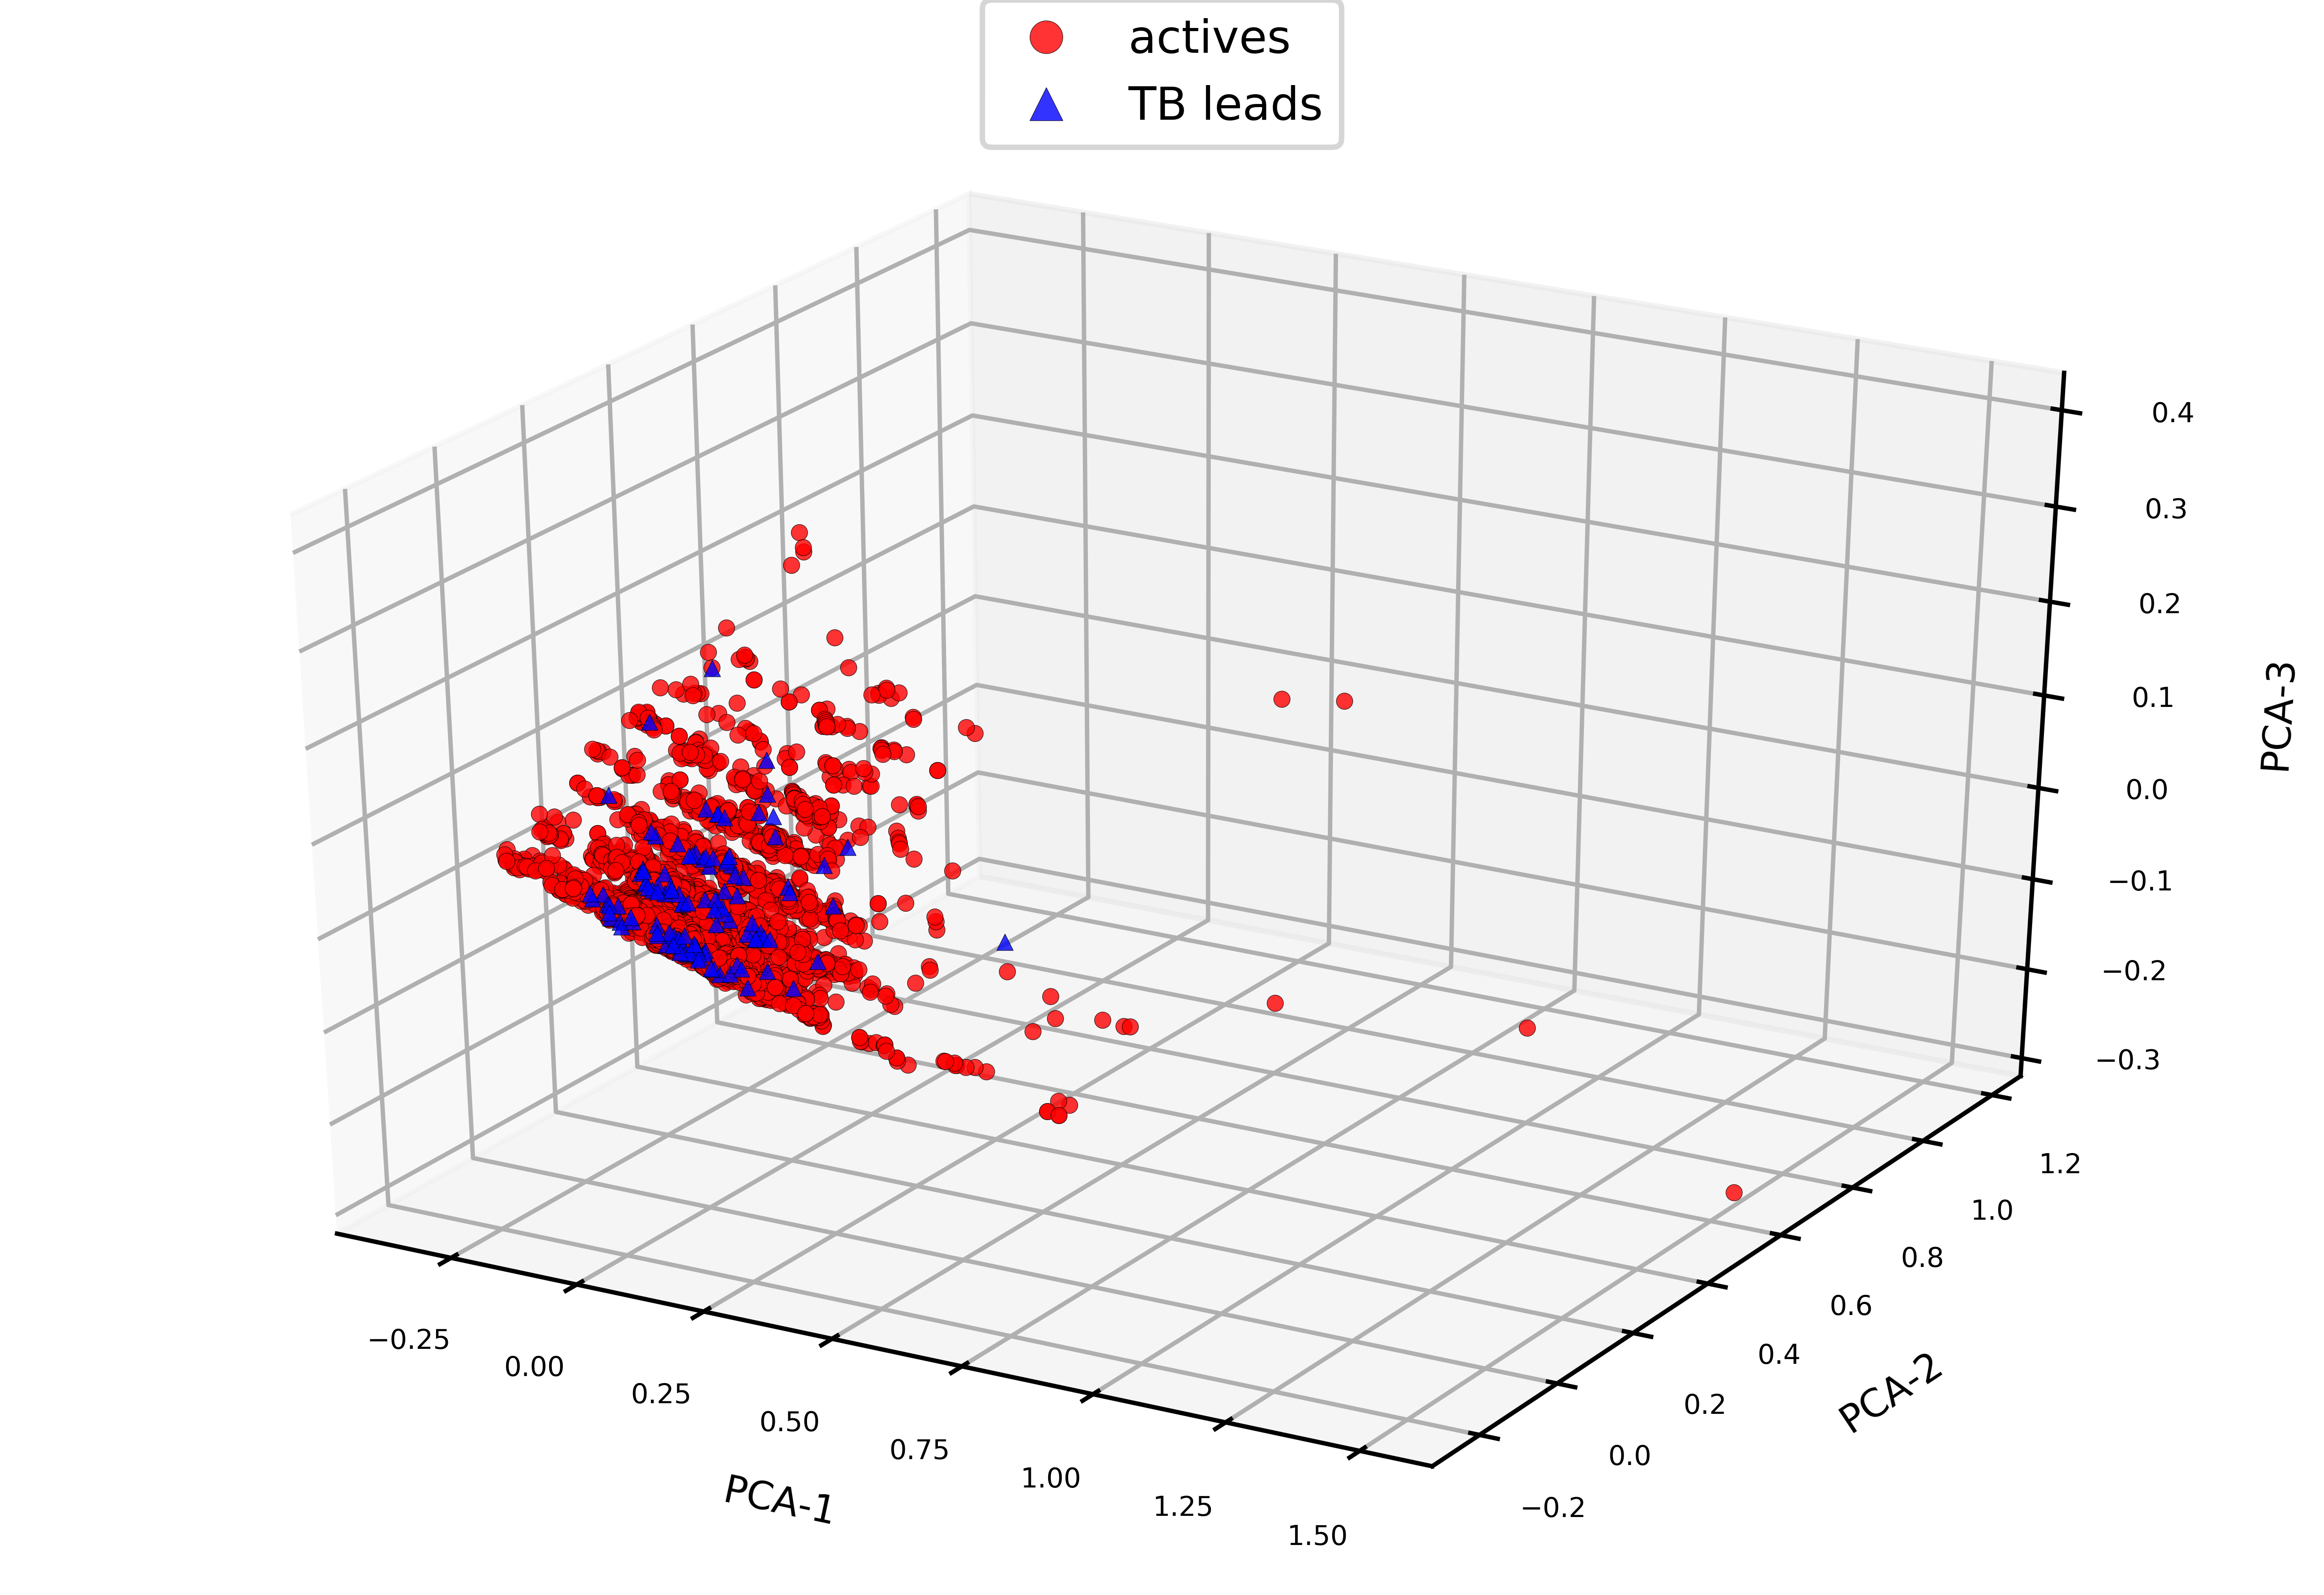

In [8]:
colors=['b', 'r']

fig = plt.figure(1)

ax = fig.add_subplot(111, projection='3d')

p2 = ax.plot(Mtb_df['pca-one'], Mtb_df['pca-two'], Mtb_df['pca-three'], 
             'o', color=colors[1], alpha = 0.8, label='actives', markersize=3, markeredgecolor='black',
            markeredgewidth=0.1)
p1 = ax.plot(MMDS_df['pca-one'], MMDS_df['pca-two'], MMDS_df['pca-three'], 
             '^', color=colors[0], alpha = 0.8, label='TB leads', markersize=3, markeredgecolor='black',
            markeredgewidth=0.1)

matplotlib.rc('xtick', labelsize=5)
matplotlib.rc('ytick', labelsize=5)

ax.set_xlabel('PCA-1', fontsize=7)
ax.set_ylabel('PCA-2', fontsize=7)
ax.set_zlabel('PCA-3', fontsize=7)

fig.legend(fontsize = 'small', loc='upper center', borderaxespad=0.,markerscale=2)
# plt.legend(loc='upper right', numpoints=1, ncol=3, fontsize=8, bbox_to_anchor=(0, 0))
plt.rcParams["figure.dpi"] = 1000
plt.rcParams.update({'figure.autolayout': True})
plt.autoscale()
plt.show()
fig_name = figure_path+'PCA/PCA_all-in-1/Table3-12/TBleads_actives_8descriptors_PCA.png'
fig.savefig(fig_name, bbox_inches='tight')

# Below is the PCA for four_merged dataframe.

In [9]:
df_descriptors = four_merged.drop(['smiles', 'dataset'], axis=1)

imputer = Imputer()
scaler = MinMaxScaler()
transformed_X = scaler.fit_transform(imputer.fit_transform(df_descriptors))


#PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(transformed_X)

four_merged['pca-one'] = pca_result[:,0]
four_merged['pca-two'] = pca_result[:,1] 
four_merged['pca-three'] = pca_result[:,2] 

for v in pca.explained_variance_ratio_:
    print('Explained variation per principal component: {}%'.format(round(v*100,2)))

Explained variation per principal component: 56.57%
Explained variation per principal component: 22.88%
Explained variation per principal component: 13.12%


C:\Users\zinph\.conda\envs\ML\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [10]:
four_merged['dataset'].unique()

array(['MMDS', 'Mtb', 'ApprovedDrugs', 'MicrosourceSpectrum'],
      dtype=object)

In [11]:
MMDS_df = four_merged[four_merged['dataset']== 'MMDS']
Mtb_df = four_merged[four_merged['dataset']=='Mtb']
approved_df = four_merged[four_merged['dataset']== 'ApprovedDrugs']
micro_df = four_merged[four_merged['dataset']== 'MicrosourceSpectrum']

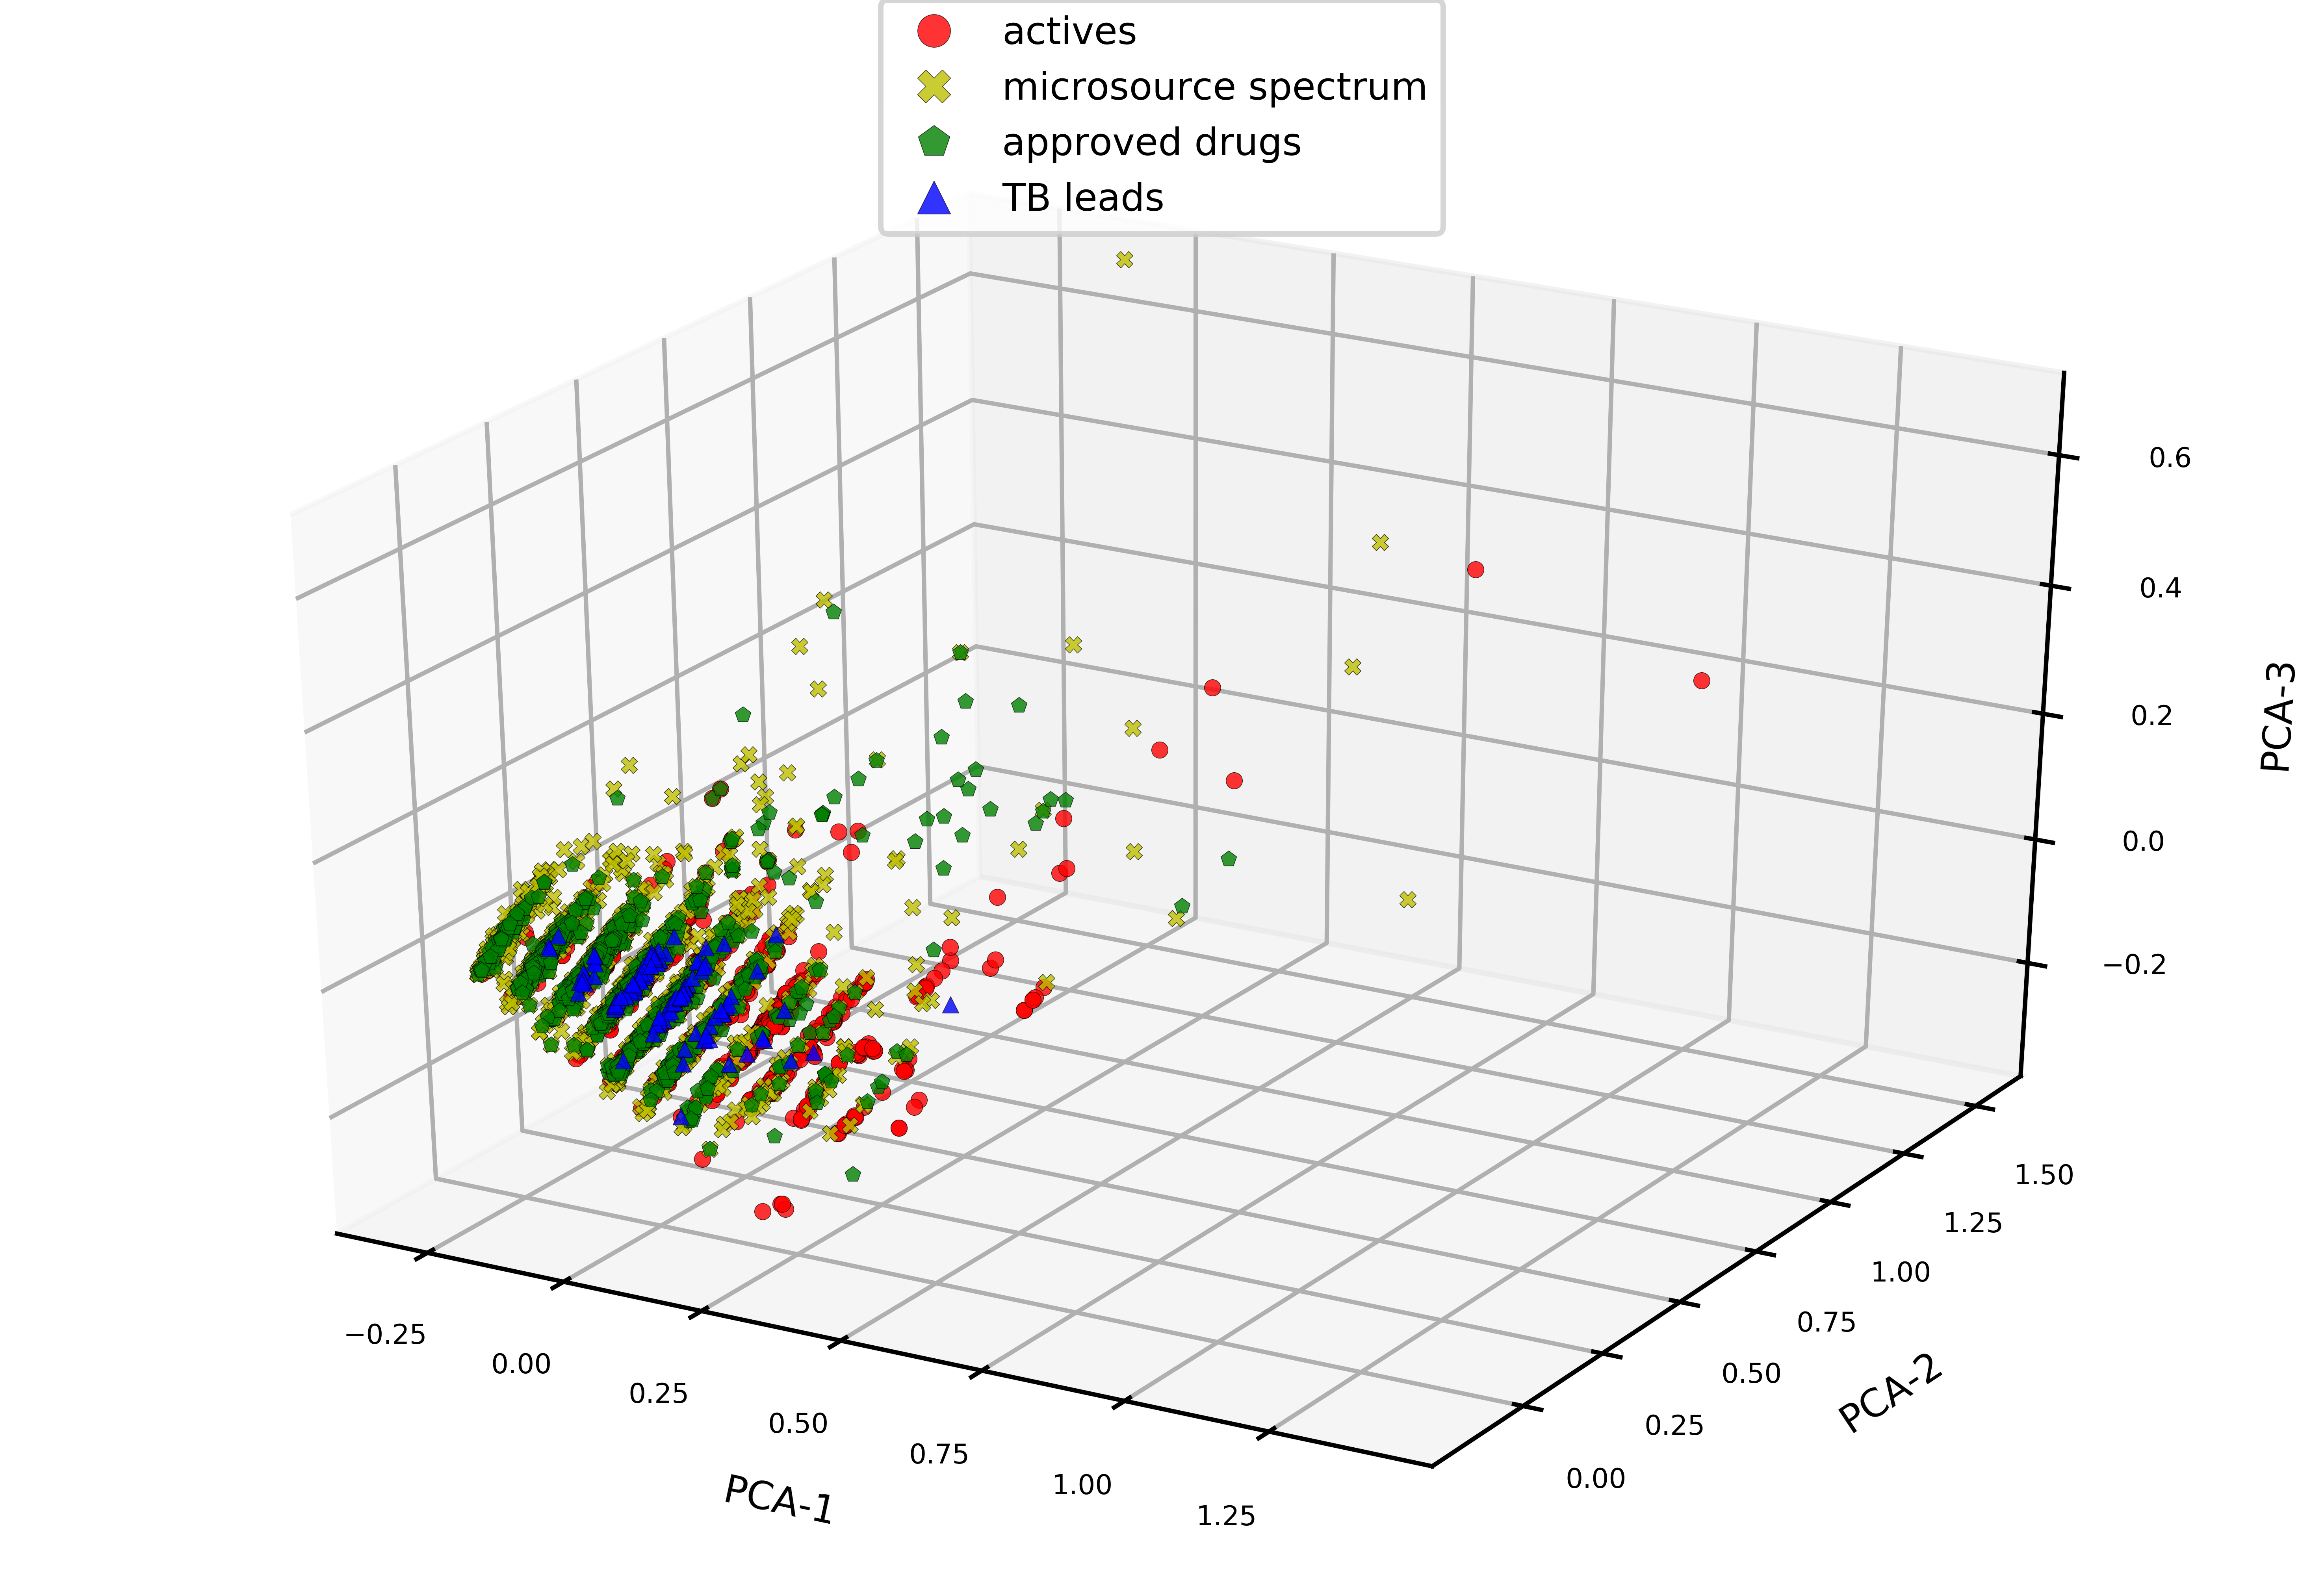

In [12]:
colors=['b', 'r', 'g', 'y']

fig = plt.figure(1)

ax = fig.add_subplot(111, projection='3d')

p2 = ax.plot(Mtb_df['pca-one'], Mtb_df['pca-two'], Mtb_df['pca-three'], 
             'o', color=colors[1], alpha = 0.8, label='actives', markersize=3, markeredgecolor='black',
            markeredgewidth=0.1)
p4 = ax.plot(micro_df['pca-one'], micro_df['pca-two'], micro_df['pca-three'], 
             'X', color=colors[3], alpha = 0.8, label='microsource spectrum', markersize=3, markeredgecolor='black',
            markeredgewidth=0.1)
p3 = ax.plot(approved_df['pca-one'], approved_df['pca-two'], approved_df['pca-three'], 
             'p', color=colors[2], alpha = 0.8, label='approved drugs', markersize=3, markeredgecolor='black',
            markeredgewidth=0.1)
p1 = ax.plot(MMDS_df['pca-one'], MMDS_df['pca-two'], MMDS_df['pca-three'], 
             '^', color=colors[0], alpha = 0.8, label='TB leads', markersize=3, markeredgecolor='black',
            markeredgewidth=0.1)

matplotlib.rc('xtick', labelsize=5)
matplotlib.rc('ytick', labelsize=5)

ax.set_xlabel('PCA-1', fontsize=7)
ax.set_ylabel('PCA-2', fontsize=7)
ax.set_zlabel('PCA-3', fontsize=7)

fig.legend(fontsize = 'x-small', loc='upper center', borderaxespad=0.,markerscale=2)
# plt.legend(loc='upper right', numpoints=1, ncol=3, fontsize=8, bbox_to_anchor=(0, 0))
plt.rcParams["figure.dpi"] = 1000
plt.rcParams.update({'figure.autolayout': True})
plt.autoscale()
plt.show()
fig_name = figure_path+'PCA/PCA_all-in-1/Table3-12/4sets_8descriptors_PCA.png'
fig.savefig(fig_name, bbox_inches='tight')